# Project 4: Can you predict that?

### Details
#### The state of Colorado has a large portion of their residential dwelling data that is  missing the year built and this document has a prediction model that can classify if a house is built pre 1980. It also predicts (regression) the actual age of each home.


In [3]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns 

In [4]:
# Load modules
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [12]:
# load data
dwellings_denver = pd.read_csv("https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_denver/dwellings_denver.csv")
dwellings_ml = pd.read_csv("https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_ml/dwellings_ml.csv")
dwellings_neighborhoods_ml = pd.read_csv("https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_neighborhoods_ml/dwellings_neighborhoods_ml.csv")   

# alt.data_transformers.enable('json') Altair no longer supports JSON
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [11]:
dwellings_denver.drop('xtraffic', axis=1, inplace=True) # drop what seems to be a useless col

In [13]:
dwellings_denver.head()

,parcel,nbhd,abstrprd,livearea,finbsmnt,basement,yrbuilt,condition,quality,totunits,...,numbaths,arcstyle,sprice,deduct,netprice,tasp,smonth,syear,qualified,status
0,00102-08-065-065,4,1130,1346,0,0,2004,AVG,C,1,...,2,MIDDLE UNIT,100000,0,100000,100000,2,2012,Q,I
1,00102-08-073-073,4,1130,1249,0,0,2005,AVG,C,1,...,2,END UNIT,94700,0,94700,94700,4,2011,Q,I
2,00102-08-078-078,4,1130,1346,0,0,2005,AVG,C,1,...,2,MIDDLE UNIT,89500,0,89500,89500,10,2010,Q,I
3,00102-08-081-081,4,1130,1146,0,0,2005,AVG,C,1,...,2,END UNIT,92000,3220,88780,88780,10,2011,Q,I
4,00102-08-086-086,4,1130,1249,0,0,2005,AVG,C,1,...,2,END UNIT,74199,0,74199,74199,3,2012,U,I


In [8]:
dwellings_ml.head()

,parcel,abstrprd,livearea,finbsmnt,basement,yrbuilt,totunits,stories,nocars,numbdrm,...,arcstyle_THREE-STORY,arcstyle_TRI-LEVEL,arcstyle_TRI-LEVEL WITH BASEMENT,arcstyle_TWO AND HALF-STORY,arcstyle_TWO-STORY,qualified_Q,qualified_U,status_I,status_V,before1980
0,00102-08-065-065,1130,1346,0,0,2004,1,2,2,2,...,0,0,0,0,0,1,0,1,0,0
1,00102-08-073-073,1130,1249,0,0,2005,1,1,1,2,...,0,0,0,0,0,1,0,1,0,0
2,00102-08-078-078,1130,1346,0,0,2005,1,2,1,2,...,0,0,0,0,0,1,0,1,0,0
3,00102-08-081-081,1130,1146,0,0,2005,1,1,0,2,...,0,0,0,0,0,1,0,1,0,0
4,00102-08-086-086,1130,1249,0,0,2005,1,1,1,2,...,0,0,0,0,0,0,1,1,0,0


## GRAND QUESTION 1
### Create 2-3 charts that evaluate potential relationships between the home variables and before 1980

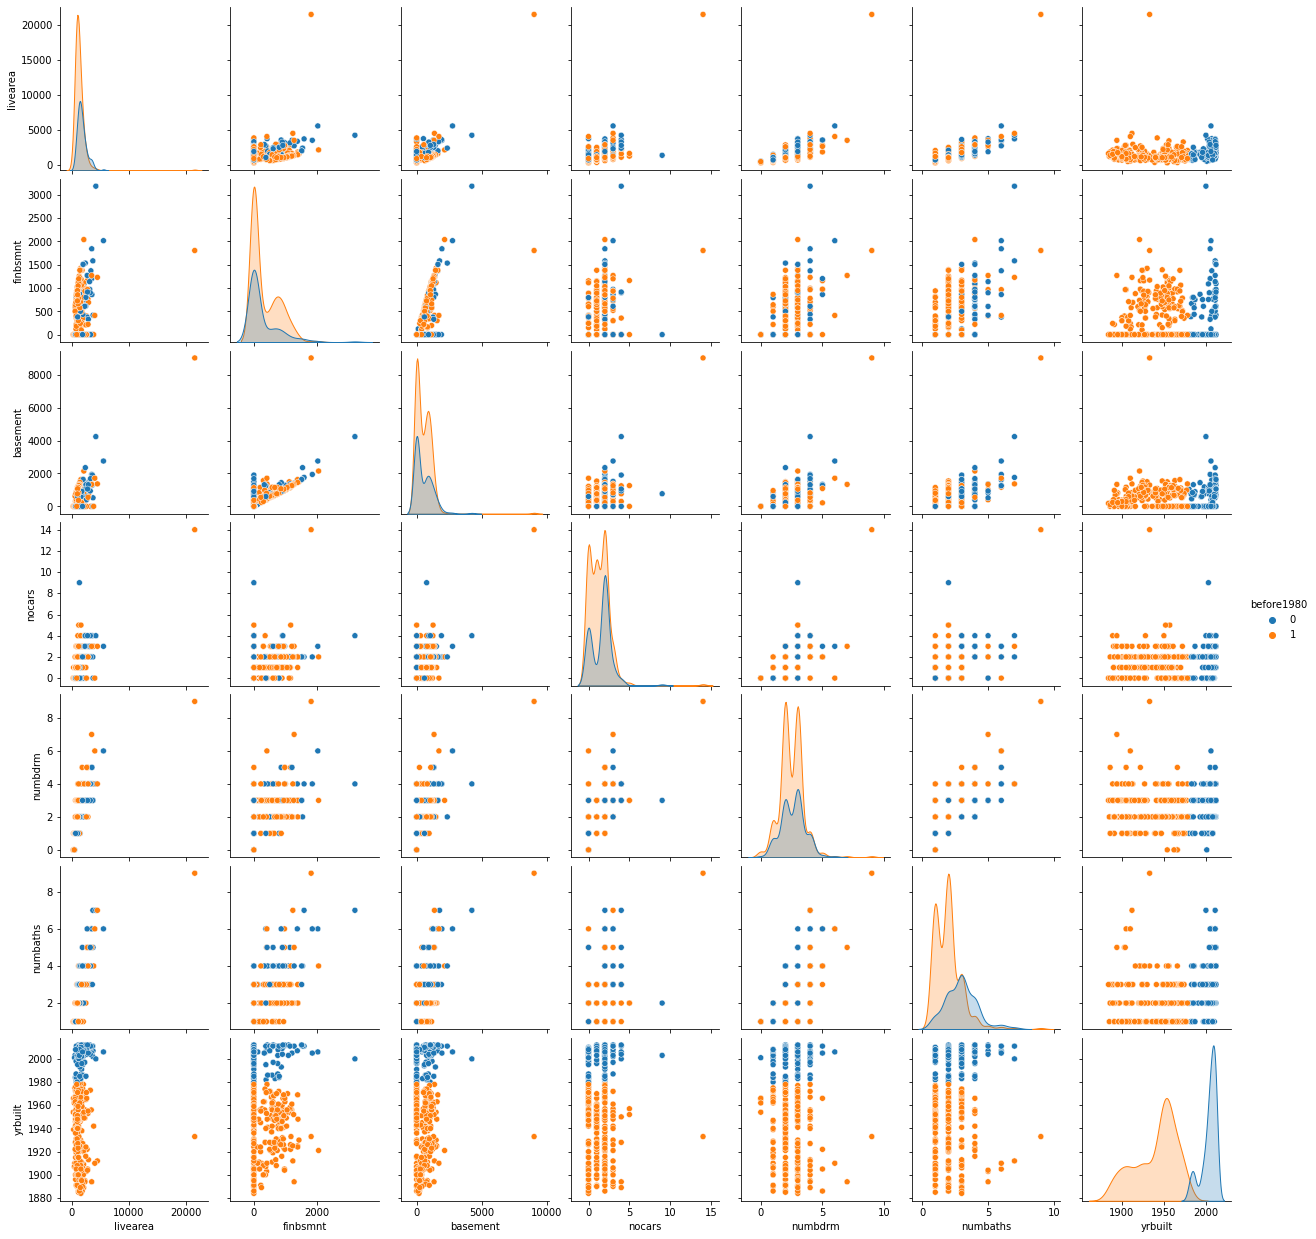

In [10]:
h_subset = dwellings_ml.filter(['livearea', 'finbsmnt', 'basement', 
    'yearbuilt', 'nocars', 'numbdrm', 'numbaths', 'before1980'
    , 'yrbuilt']).sample(500)
sns.pairplot(h_subset, hue = 'before1980')

In [11]:
#### Exercise 1 ####

# Q for quantitative data
# O for ordinal data
# N for nominal data
# T for temporal data
# G for geographic data



WARN Infinite extent for field "sprice": [Infinity, -Infinity]
WARN Infinite extent for field "stories_start": [Infinity, -Infinity]
WARN Infinite extent for field "stories_end": [Infinity, -Infinity]


alt.Chart(...)

In [17]:
X_pred = dwellings_ml.drop(dwellings_ml.filter(regex = 'before1980|yrbuilt').columns, axis = 1)

y_pred = dwellings_ml.filter(regex = "before1980")

X_train, X_test, y_train, y_test = train_test_split(X_pred, y_pred, test_size = .34, random_state = 76)  

In [18]:
y_test

,before1980
16075,0
10563,0
14087,1
9622,0
2172,1
...,...
2738,0
16119,1
10076,0
14997,1


In [19]:

X_train

,parcel,abstrprd,livearea,finbsmnt,basement,totunits,stories,nocars,numbdrm,numbaths,...,arcstyle_SPLIT LEVEL,arcstyle_THREE-STORY,arcstyle_TRI-LEVEL,arcstyle_TRI-LEVEL WITH BASEMENT,arcstyle_TWO AND HALF-STORY,arcstyle_TWO-STORY,qualified_Q,qualified_U,status_I,status_V
18275,06054-36-012-000,1112,2339,0,0,1,1,2,3,3,...,0,0,0,0,0,0,1,0,1,0
17932,06043-39-012-000,1112,2726,0,1095,1,2,2,4,4,...,0,0,0,0,0,1,0,1,0,1
5121,01342-01-025-025,1130,1322,0,0,1,1,3,2,2,...,0,0,0,0,0,0,1,0,1,0
12314,05072-14-004-000,1112,852,0,0,1,1,0,3,1,...,0,0,0,0,0,0,1,0,1,0
790,00154-18-013-000,1112,2070,0,0,1,2,2,4,3,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22810,09113-12-042-042,1130,1441,0,0,1,1,2,3,2,...,0,0,0,0,0,0,1,0,1,0
6528,02251-29-012-000,1112,1725,0,0,1,2,2,3,3,...,0,0,0,0,0,1,1,0,1,0
9607,02345-44-227-227,1130,1001,0,0,1,1,0,1,1,...,0,0,0,0,0,0,1,0,1,0
12279,05071-38-017-000,1112,750,0,0,1,1,2,2,1,...,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:>

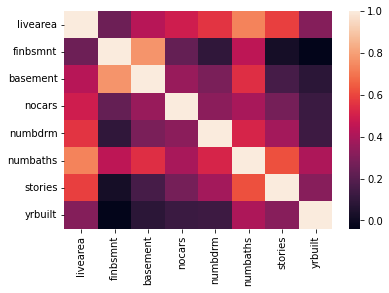

In [11]:
corr = h_subset.drop(columns = 'before1980').corr()
sns.heatmap(corr)

## GRAND QUESTION 2
### Can you build a classification model (before or after 1980) that has at least 90% accuracy for the state of Colorado to use (explain your model choice and which models you tried)?

 a. Write an SQL query that provides playerID, yearID, and batting average for players with at least one at bat. Sort the table from highest batting average to lowest, and show the top 5 results in your report.


## GRAND QUESTION 3
### Will you justify your classification model by detailing the most important features in your model (a chart and a description are a must)?

## GRAND QUESTION 4
### Can you describe the quality of your classification model using 2-3 evaluation metrics? You need to provide an interpretation of each evaluation metric when you provide the value.
